<a href="https://colab.research.google.com/github/delafte/CC3001-Algoritmos_y_Estructuras_de_Datos/blob/main/Tarea4/Copia_de_CC3001_2023_1Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2023 Tarea 4[Delaney Tello]
# Generación de código

Profesores: Iván Sipirán / Nelson Baloian / Patricio Poblete


El objetivo de esta tarea es aprender sobre la manipulación de árboles que representan fórmulas. Hay muchas cosas que uno puede hacer con estos árboles, y en esta tarea nos enfocaremos en particular en algo que los compiladores hacen: la **generación de código** para evaluar fórmulas.

Específicamente, el problema es: dada una fórmula, generar una secuencia de instrucciones elementales que la evalúen. Por ejemplo, dada una fórmula como

```
(a+b)*(c-d)
```

se podría generar código como el siguiente:

```
t1=a+b
t2=c-d
t3=t1*t2
```

Las instrucciones elementales son siempre de la forma ``ti=x op y``, donde ``ti`` es una variable temporal, ``x`` e ``y`` pueden ser variables o números, y ``op`` es un operador. Uno va creando variables ``t1``, ``t2``, ... a medida que las necesita, y la última de ellas es la que almacena el valor final de la fórmula.

Las fórmulas pueden ser arbitrariamente complicadas, como por ejemplo la fórmula

$$
(2-p\,q)\left( \frac{1}{n}+\frac{1}{p+q}\right)
$$

la cual escribimos como

```
(2-p*q)*(1/n+1/(p+q))
```

y cuyo código generado podría ser,

```
t1=p*q
t2=2-t1
t3=1/n
t4=p+q
t5=1/t4
t6=t3+t5
t7=t2*t6
```

El objetivo de esta tarea es que usted implemente una función que, dado un árbol ya construído, lo recorra para generar una secuencia de instrucciones elementales que lo evalúe.

A continuación usted encontrará clases ``Nodoi``, ``Nodoe`` y ``Arbol`` que implementan árboles que representan fórmulas. La clase ``Arbol`` viene con un constructor que recibe un string como parámetro, el cual contiene una fórmula, y este constructor se encarga de transformar la fórmula de string a árbol, de modo que usted no necesita preocuparse de eso. Para simplificar, la fórmula solo podrá contener variables de una sola letra, números de un solo dígito, y sin espacios. Los operadores permitidos son solo suma, resta, multiplicación y división. No hay operador menos unario.

Usted tienen que implementar para la clase ``Arbol`` una función ``codigo`` que al ser invocado genere una secuencia de instrucciones elementales para evaluar la fórmula representada por ese árbol, y la retorne en forma de una lista (de Python).

In [ ]:
# Ejecutar esto para poder visualizar los árboles

!pip install aed-utilities

In [ ]:
class NodoLista:
    def __init__(self,info,sgte=None):
        self.info=info
        self.sgte=sgte
class Pila:
    def __init__(self):
        self.tope=None
    def push(self,x):
        self.tope=NodoLista(x,self.tope)
    def pop(self):
        assert self.tope is not None
        x=self.tope.info
        self.tope=self.tope.sgte
        return x
    def is_empty(self):
        return self.tope is None

In [ ]:
from os import listxattr
import aed_utilities as aed

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

class Nodoe:
    def __init__(self, info):
        self.info=info
#creamos funcion auxiliar para recorrer arbol en postorden y almacernalo en una lista
def recorrer(p,lista):
  operadores = "+*-/"#operadores aceptados
  if p.info.isdigit() or p.info.isalpha():
    lista.append(p.info)
  if p.info in operadores:
    recorrer(p.izq,lista)
    recorrer(p.der,lista)
    lista.append(p.info)
class Arbol:
    def __init__(self,formula):
        global k
        global s
        s=formula+";" # agregamos una marca de fin de la entrada
        k=0 # indica próximo caracter por procesar
        # definimos funciones para analizar la fórmula
        def expresion(): # retorna puntero a la raíz de un árbol que representa a la fórmula s
            global k
            global s
            a=factor()
            while s[k]=="+" or s[k]=="-":
                op=s[k]
                k+=1
                b=factor()
                a=Nodoi(a,op,b)
            return a
        def factor():
            global k
            global s
            a=termino()
            while s[k]=="*" or s[k]=="/":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def termino(): # posible constante, variable o formula parentizada
            global k
            global s
            if s[k].isalpha() or s[k].isdigit():
                a=Nodoe(s[k])
                k+=1
                return a
            if s[k]=="(": # fórmula parentizada
                k+=1
                a=expresion()
                if s[k]!=")":
                    print("Error: Falta cierra paréntesis: "+formula[k:])
                    assert False
                k+=1
                return a
            print("Error: Falta variable, número o abre paréntesis: "+formula[k:])
            assert False

        a=expresion()
        if s[k]!=";":
            print("Error: Basura al final de la fórmula: "+formula[k:])
            assert False
        self.raiz=a

    def codigo(self):
      #definimos variables iniciales
        contador = 1
        p = self.raiz
        lista = []
        resultado=[]
        pila = Pila()
        #usamos funcion auxiliar
        recorrer(p,lista)

        for elemento in lista:
          if elemento.isdigit() or elemento.isalpha():
              pila.push(elemento)#si el elemento es una variable, lo almacenamos en la pila
          else:#si es un operador
            a = pila.pop()
            b = pila.pop()
            variable = f"t{contador}"
            valor = variable +"="+ str(b)+ str(elemento)+ str(a)#generamos la ecuacion
            resultado.append(valor)#lo agregamos a la lista
            pila.push(variable)
            contador+=1
        if pila.is_empty() == False:#caso en que solo se agrega una variable
          a = pila.pop()
          if a.isalpha() or a.isdigit():
            valor ="t1"+"="+str(a)
            resultado.append(valor)
        return resultado#retornamos lista

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

A continuación probamos esta funcionalidad con varias fórmulas de ejemplo. Para ver si el árbol fue construido correctamente, lo dibujamos.

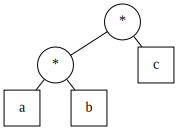

In [ ]:
Arbol("a*b*c").dibujar()

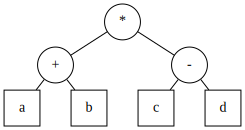

In [ ]:
Arbol("(a+b)*(c-d)").dibujar()

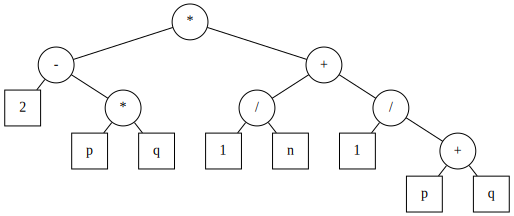

In [ ]:
Arbol("(2-p*q)*(1/n+1/(p+q))").dibujar()

## Resultados

En esta sección probamos la generación de código que usted tiene que escribir. Mientras usted no sustituya la función ``codigo`` provisoria que viene en la definición de la clase, va a aparecer la lista que generamos ahí. Primero vamos a definir una función ``probar`` que genera el código a partir de una fórmula dada e imprime el resultado:

In [ ]:
def probar(formula):
    a=Arbol(formula)
    for x in a.codigo():
        print(x)

A continuación probamos con varias fórmulas. Además de las fórmulas dadaas, usted tiene que agregar tres ejemplos adicionales.

In [ ]:
probar("a+1")

t1=a+1


In [ ]:
probar("(a+b)*(c-d)")

t1=a+b
t2=c-d
t3=t1*t2


In [ ]:
probar("(2-p*q)*(1/n+1/(p+q))")

t1=p*q
t2=2-t1
t3=1/n
t4=p+q
t5=1/t4
t6=t3+t5
t7=t2*t6


In [ ]:
probar("((((a+b)+c)+d)+e)")

t1=a+b
t2=t1+c
t3=t2+d
t4=t3+e


In [ ]:
probar("(a+(b+(c+(d+e))))")

t1=d+e
t2=c+t1
t3=b+t2
t4=a+t3


In [ ]:
probar("a")

t1=a


In [ ]:
#adicionales:
probar("(2*5*a*b/3)/(b-c*(a*b))")

t1=2*5
t2=t1*a
t3=t2*b
t4=t3/3
t5=a*b
t6=c*t5
t7=b-t6
t8=t4/t7


In [ ]:
probar("(a*b)/(c-d*u)+(a*p)")

t1=a*b
t2=d*u
t3=c-t2
t4=t1/t3
t5=a*p
t6=t4+t5


In [ ]:
probar("a+b+c+d+(5-7/t)*6")

t1=a+b
t2=t1+c
t3=t2+d
t4=7/t
t5=5-t4
t6=t5*6
t7=t3+t6


## Para los que quieran aprender más (opcional)

Suponga que hay escasez de variables temporales, así que se le ha pedido que trate de reciclarlas lo más posible, y solo crear nuevas variables ``ti`` cuando sea estrictamente necesario. Por ejemplo, para la fórmula

```
((a+b)*c)+((d-e)/f)
```

si generamos código como lo hemos hecho en los ejemplos anteriores (código de la izquierda), se usan 5 variables temporales, pero el código de la derecha muestra que se puede evaluar usando solo 2:

```
t1=a+b               t1=a+b
t2=t1+c              t1=t1*c
t3=d-e               t2=d-e
t4=t3/f              t2=t2/f
t5=t2+t4             t1=t1+t2
```

Piense cómo se podría modificar su algoritmo para que use el mínimo posible de variables temporales.

No es necesario que implemente nada, solo que considere cómo se podría hacer. Si se le ocurre algo interesante, puede escribirlo al final de su tarea, pero no es obligatorio ni influye en la nota. ¡La satisfacción de poder resolver el problema es su propia recompensa!